In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# FacetGrid

## Sử dụng seaborn

In [2]:
tips = sns.load_dataset("tips")

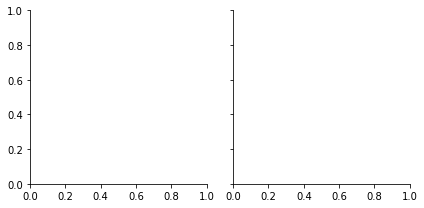

In [3]:
#Khởi tạo grid, tách tập dữ liệu theo "time"
g = sns.FacetGrid(tips, col="time")

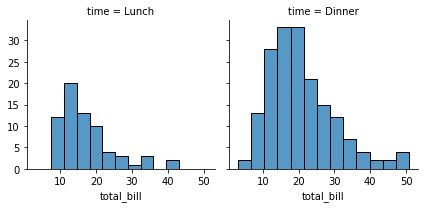

In [4]:
#Khởi tạo grid, tách tập dữ liệu theo "time"
g = sns.FacetGrid(tips, col="time")

#Sử dụng hàm map() để vẽ đồ thị trên các ô dữ liệu trong lưới
g.map(sns.histplot, "total_bill")

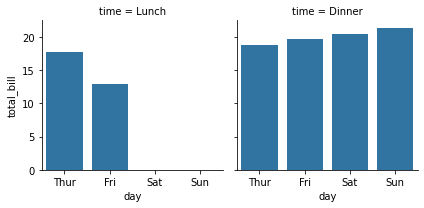

In [5]:
#Khởi tạo grid, tách tập dữ liệu theo "time"
g = sns.FacetGrid(tips, col="time")

#Sử dụng hàm map() để vẽ đồ thị trên các ô dữ liệu trong lưới
g.map(sns.barplot,"day","total_bill",ci=0)

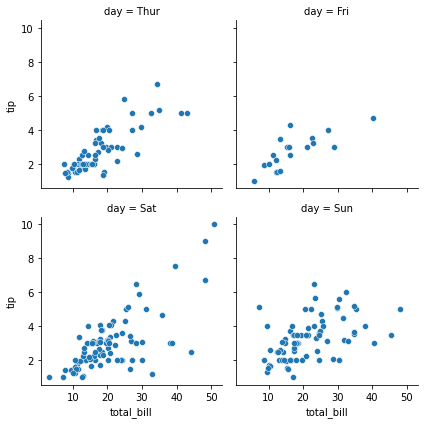

In [6]:
g = sns.FacetGrid(tips, col="day", col_wrap=2)

#Sử dụng hàm map() để vẽ đồ thị trên các ô dữ liệu trong lưới
g.map(sns.scatterplot, "total_bill","tip")

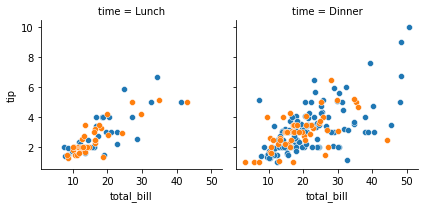

In [7]:
g = sns.FacetGrid(tips, col="time", hue="sex")

#Sử dụng hàm map() để vẽ đồ thị trên các ô dữ liệu trong lưới
g.map(sns.scatterplot, "total_bill","tip")

### Sử dụng PairGrid để phân tích các biến số trong tập dữ liệu

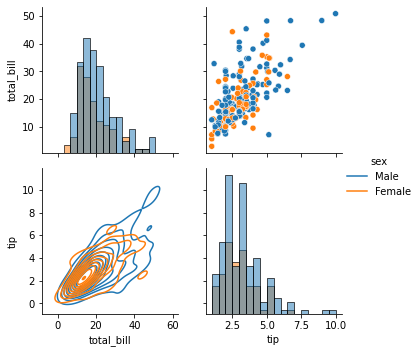

In [8]:
#Định nghĩa lưới
g = sns.PairGrid(tips[['total_bill','tip','sex']],hue="sex")

#Vẽ biểu đồ ở đường chéo trên, đường chéo dưới và trên đường chéo
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)
g.add_legend()

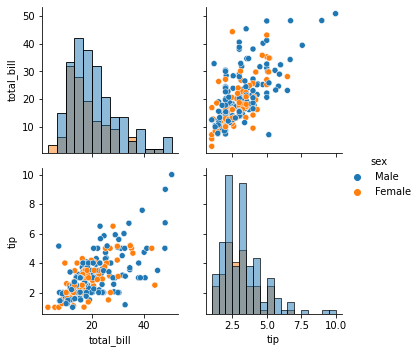

In [9]:
#Định nghĩa lưới
g = sns.PairGrid(tips[['total_bill','tip','sex']],hue="sex")

#Vẽ biểu đồ ở đường chéo và khu vực không phải đường chéo 
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot)
g.add_legend()

### Sử dụng Pairplot để phân tích nhanh các biến số trong tập dữ liệu

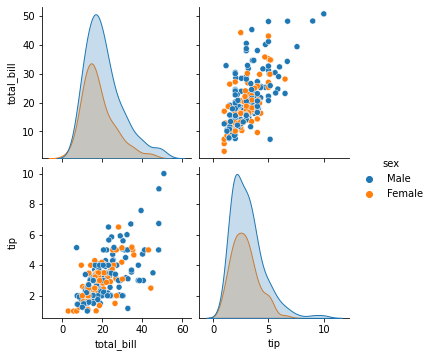

In [10]:
sns.pairplot(tips[['total_bill','tip','sex']], hue="sex")

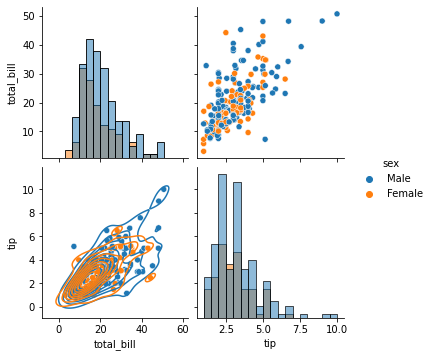

In [11]:
#Vẽ lại biểu đồ ở trên bằng cách hiệu chỉnh các tham số của pairplot và map
g=sns.pairplot(tips[['total_bill','tip','sex']], hue="sex", diag_kind="hist")
g.map_lower(sns.kdeplot)

### Sử dụng JointGrid để phân tích cặp biến số

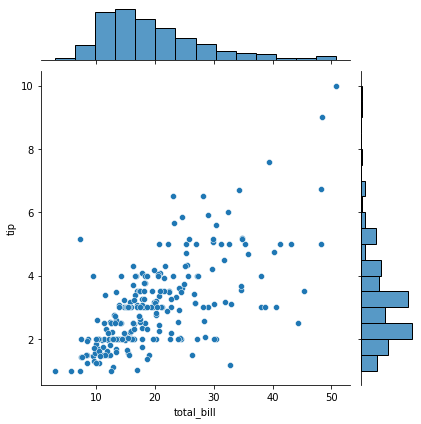

In [12]:
#Định nghĩa lưới
g=sns.JointGrid(data=tips, x='total_bill', y='tip')

#Vẽ biểu đồ 
g.plot(sns.scatterplot, sns.histplot)

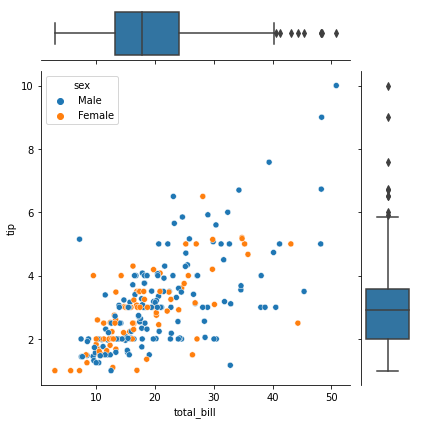

In [13]:
#Định nghĩa lưới
g=sns.JointGrid(data=tips, x='total_bill', y='tip',hue="sex")

#Vẽ biểu đồ 
g.plot(sns.scatterplot, sns.boxplot)

### Sử dụng jointplot để phân tích cặp biến số

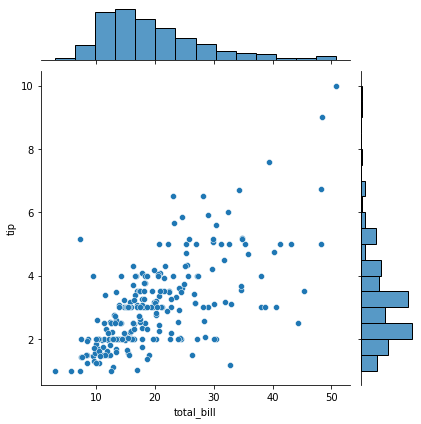

In [14]:
sns.jointplot(x='total_bill', y='tip', data=tips)

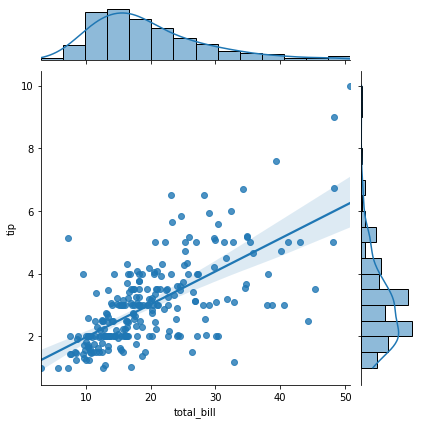

In [15]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind="reg")

## Tham khảo - phân tích grid cho tập dữ liệu VĐV

In [16]:
athletes = pd.read_csv('athletes.csv', index_col=0)

In [17]:
athletes.head()

,name,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze,total,year,age
0,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,0,1969,47
1,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,0,1986,30
2,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,1,1992,24
3,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,0,1991,25
4,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,0,1990,26


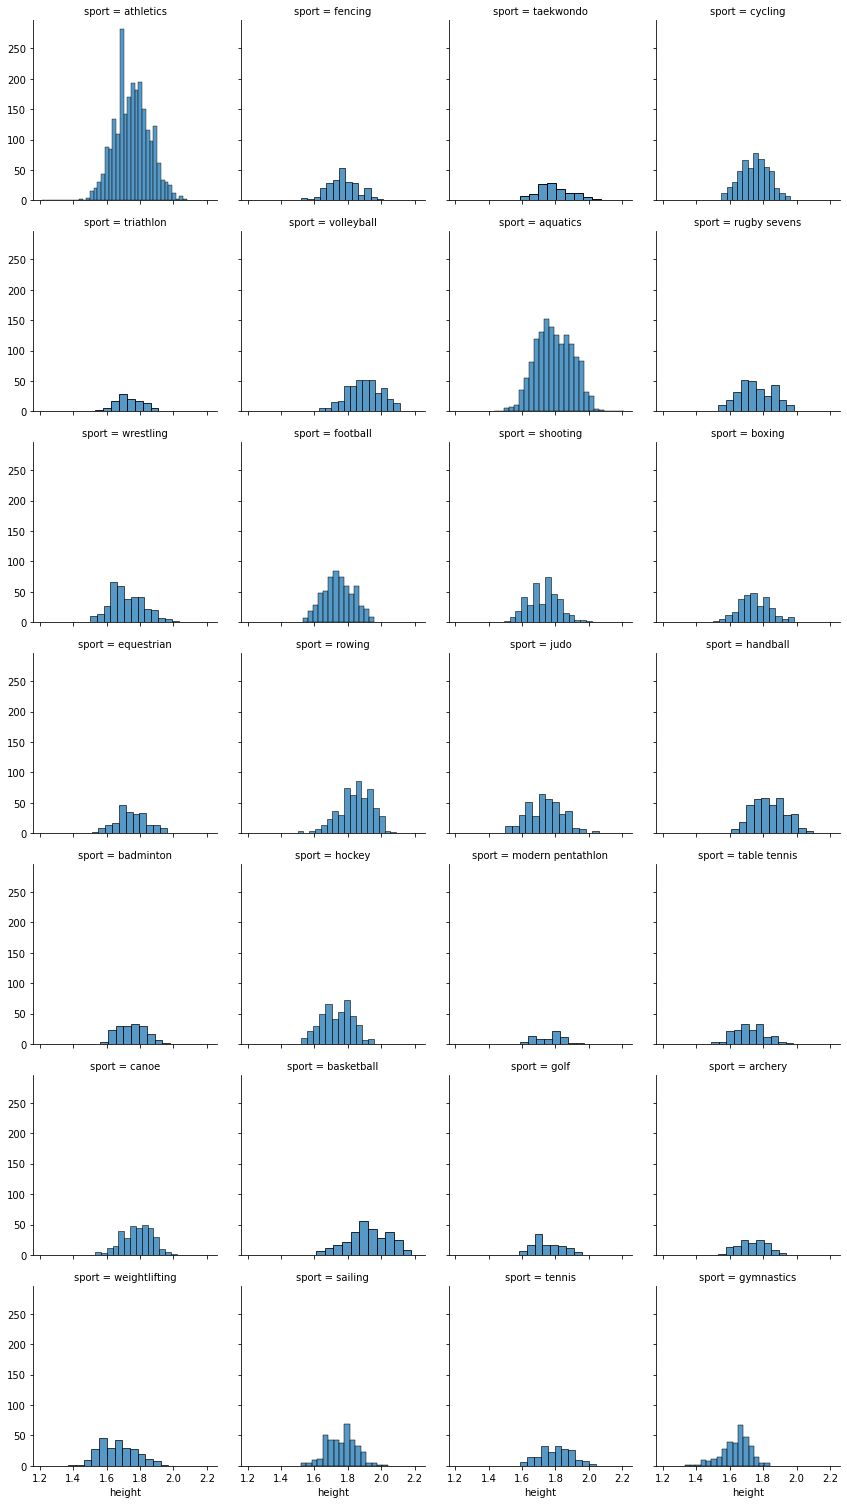

In [18]:
g = sns.FacetGrid(data=athletes, col='sport', col_wrap=4, sharex=True)
g.map(sns.histplot, 'height')
plt.show()

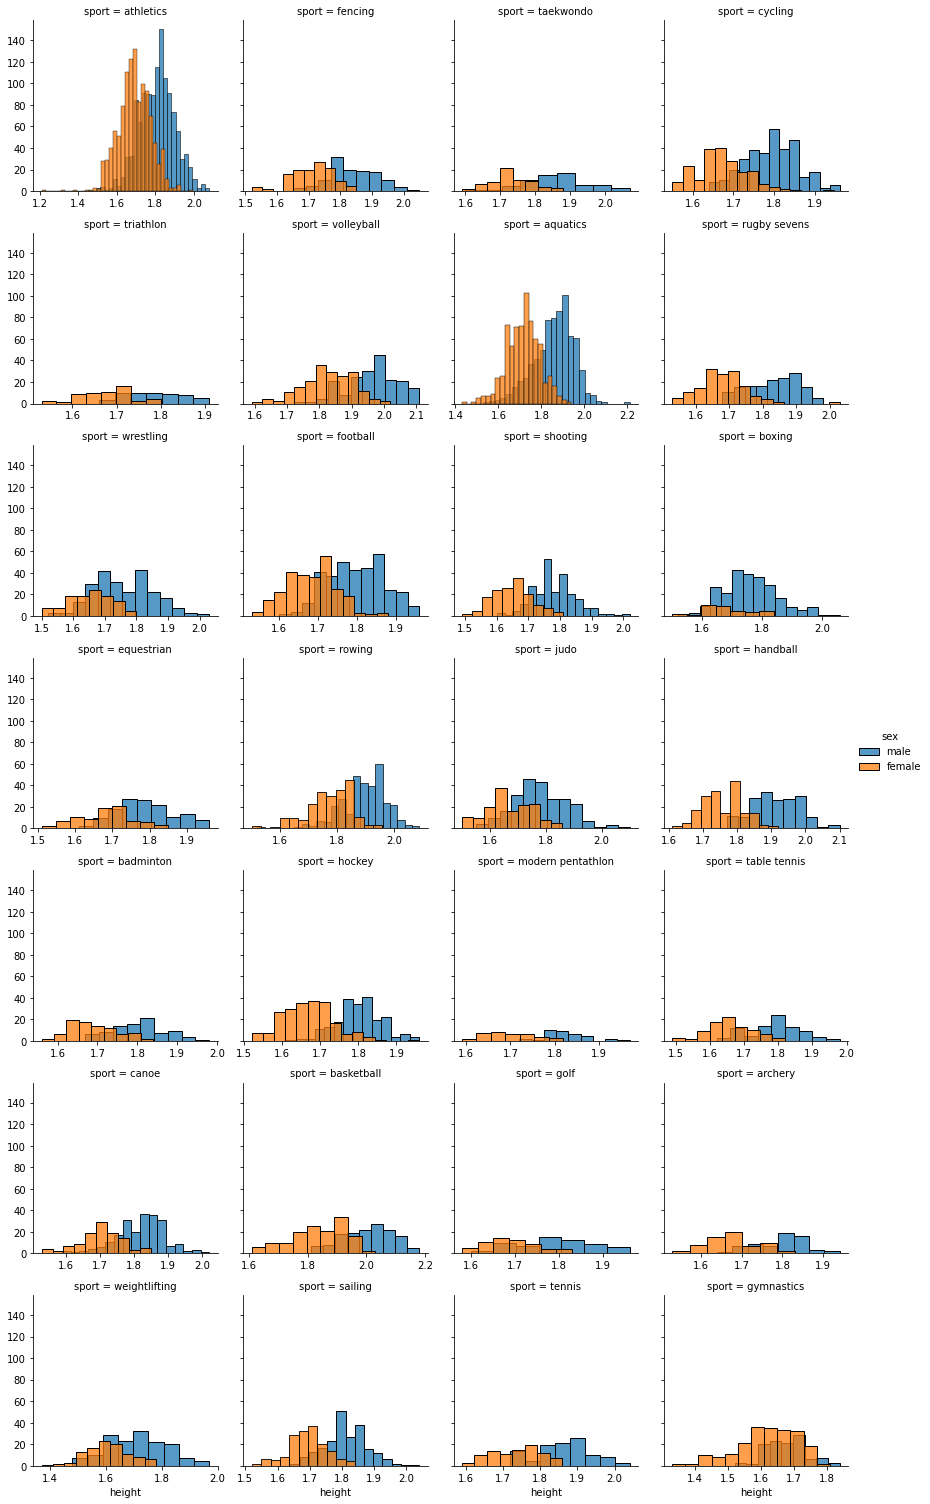

In [19]:
g = sns.FacetGrid(data=athletes, col='sport', col_wrap=4, hue='sex', sharex=False)
g.map(sns.histplot, 'height')
g.add_legend()
plt.show()

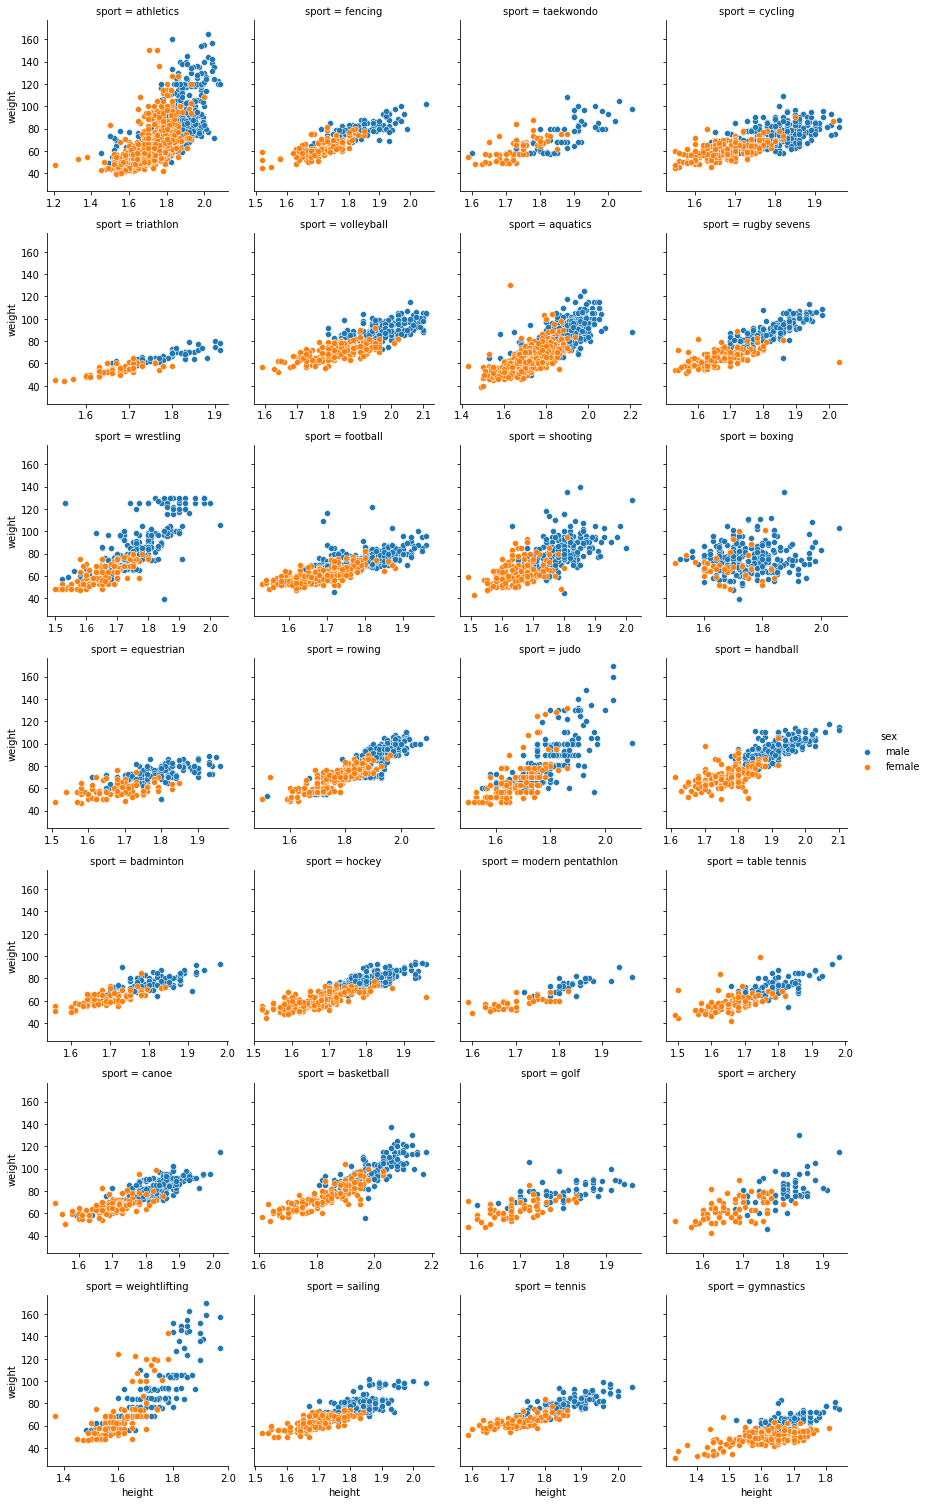

In [20]:
g = sns.FacetGrid(data=athletes, col='sport', col_wrap=4, hue='sex', sharex=False)
g.map(sns.scatterplot, 'height', 'weight')
g.add_legend()
plt.show()

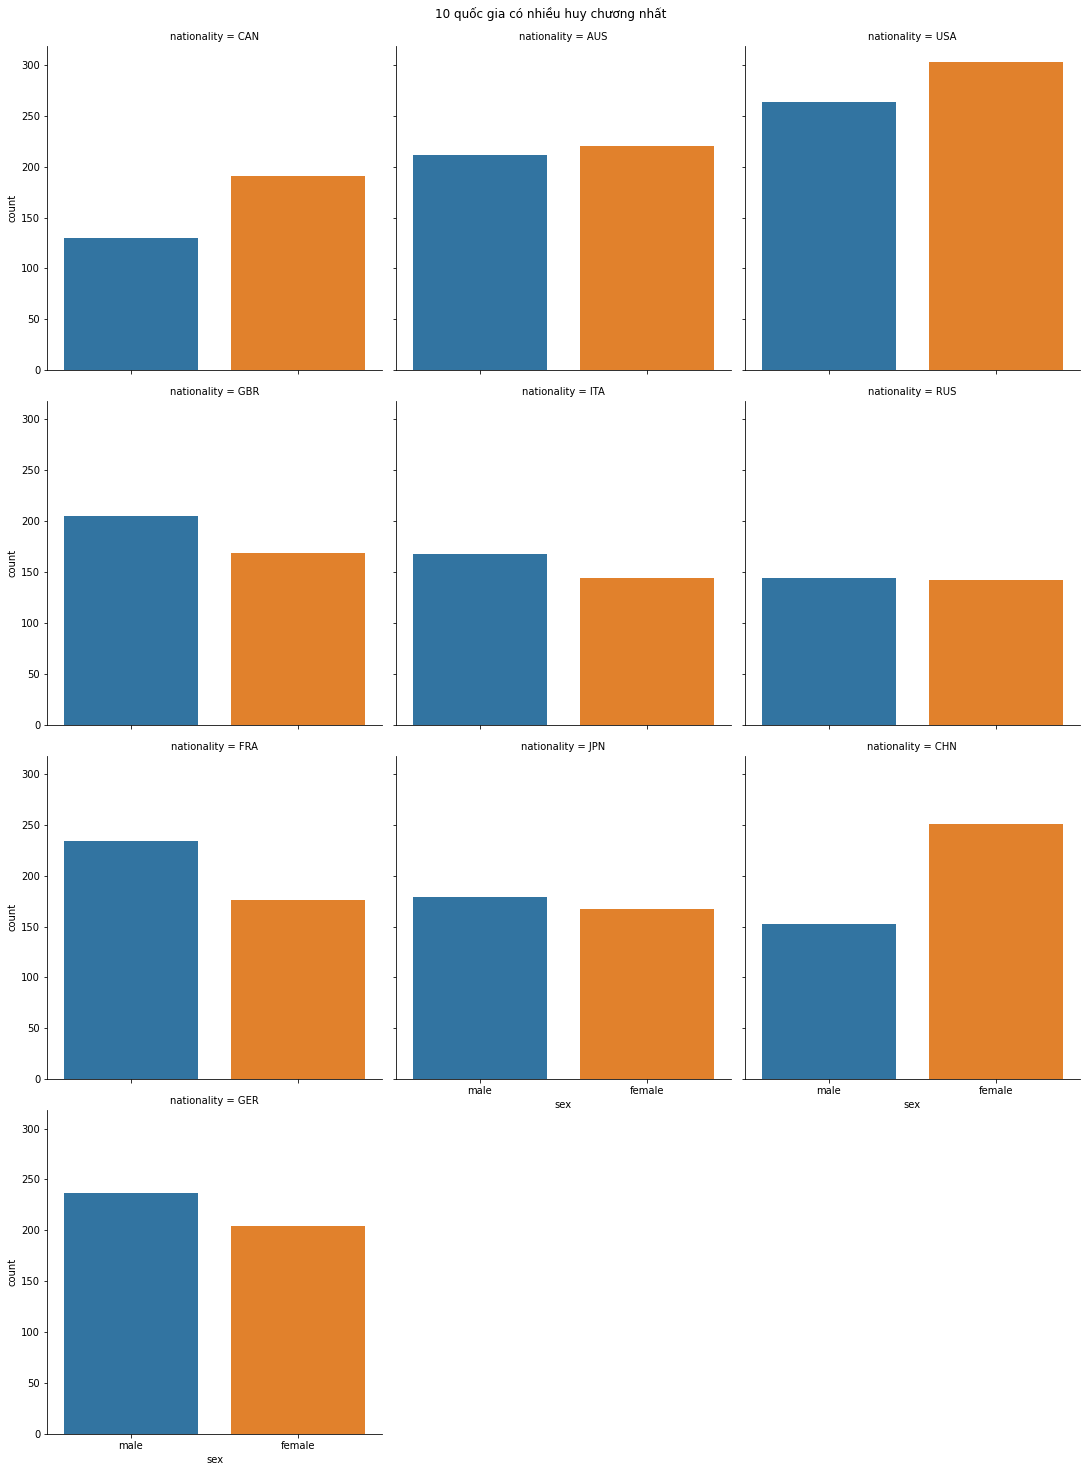

In [21]:
ser = athletes.groupby('nationality')['total'].sum().sort_values(ascending=False).head(10)
df_ = athletes[athletes['nationality'].isin(ser.index)]

sns.catplot(data=df_, col='nationality', col_wrap=3, kind='count', x='sex')
plt.suptitle('10 quốc gia có nhiều huy chương nhất', y=1.01)
plt.show()